In [1]:
install.packages("randomForest",repos = "http://cran.us.r-project.org")
#this is to get random forest package onto your computer
#should only need to be done once, ever, per computer

Installing package into 'C:/Users/labmc/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\labmc\AppData\Local\Temp\RtmpMNSSJ6\downloaded_packages


In [1]:
library("randomForest")
#needs to be done each time
#makes the package available in your jupyter environment

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [2]:
getwd()

[1] "C:/Users/labmc/Documents/Mahbobeh/toxoplasma/random_forest/LI_contents"

In [4]:
features<-read.csv("LI_contents_0deleted_waveICA_bacheffect_removed.csv", header = TRUE)
head(features)
dim(features)

,sample.id,injection_order,organ_content,Mouse_nu,Days.post.infection,Condition,genotypes,gen_con_DPI,Box.,Tissue.Collection.Date,⋯,X416.336_2.54,X259.205_2.81,X482.329_2.62,X361.237_2.68,X198.075_0.61,X663.452_4.42,X553.389_3.57,X748.526_3.58,X112.05_0.31,X204.123_0.3.1
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LI_contents_9_15_INFECTED_WT_INF_3_10_7_2021_3_179_A8,15,LI_contents,9,15,INFECTED,WT_INF,WT_INF_15,3,10_7_2021,⋯,-154835.82,-596084.8,-52984.95,48789.43,102536.5,-1063897.6,-224342.24,-209242.28,-344422.9,2134031
2,LI_contents_32_15_UNINFECTED_IL1R_UNINF_3_10_14_2021_13_181_H8,16,LI_contents,32,15,UNINFECTED,IL1R_UNINF,IL1R_UNINF_15,3,10_14_2021,⋯,-102276.81,126536.9,-52439.94,-69708.23,-980024.0,-570684.7,-222034.63,-207089.99,-340880.1,2895902
3,LI_contents_27_15_UNINFECTED_WT_UNINF_2_10_14_2021_12_181_C8,25,LI_contents,27,15,UNINFECTED,WT_UNINF,WT_UNINF_15,2,10_14_2021,⋯,34217.23,782899.4,12423.51,-141042.85,-2436199.3,229701.7,52602.09,49061.57,80757.7,3203520
4,LI_contents_18_15_INFECTED_IL1R_INF_5_10_7_2021_5_180_B8,26,LI_contents,18,15,INFECTED,IL1R_INF,IL1R_INF_15,5,10_7_2021,⋯,182674.23,1270223.9,82029.23,-132096.97,-3239989.2,1107376.1,347317.90,323940.73,533222.0,3254236
5,LI_contents_11_15_UNINFECTED_WT_UNINF_3_10_7_2021_13_179_C8,36,LI_contents,11,15,UNINFECTED,WT_UNINF,WT_UNINF_15,3,10_7_2021,⋯,314849.22,1603369.4,146751.41,-81058.71,-3656754.2,1867963.2,621356.49,579534.42,953941.5,3327008
6,LI_contents_29_15_INFECTED_WT_INF_3_10_14_2021_3_181_E8,55,LI_contents,29,15,INFECTED,WT_INF,WT_INF_15,3,10_14_2021,⋯,446445.38,1880550.1,230862.15,35210.23,-3610412.6,2476250.1,977487.65,911695.21,1500694.2,3521010


[1]   61 2789

In [20]:
# to deleted levels of one variable we should droplevel() otherwise it gives us error.
features_LI_contents <- droplevels(features[features$organ_content=="LI_contents",])
head(features_LI_contents)
dim(features_LI_contents)

,sample.id,injection_order,organ_content,Mouse_nu,Days.post.infection,Condition,genotypes,gen_con_DPI,Box.,Tissue.Collection.Date,⋯,X416.336_2.54,X259.205_2.81,X482.329_2.62,X361.237_2.68,X198.075_0.61,X663.452_4.42,X553.389_3.57,X748.526_3.58,X112.05_0.31,X204.123_0.3.1
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LI_contents_9_15_INFECTED_WT_INF_3_10_7_2021_3_179_A8,15,LI_contents,9,15,INFECTED,WT_INF,WT_INF_15,3,10_7_2021,⋯,-154835.82,-596084.8,-52984.95,48789.43,102536.5,-1063897.6,-224342.24,-209242.28,-344422.9,2134031
2,LI_contents_32_15_UNINFECTED_IL1R_UNINF_3_10_14_2021_13_181_H8,16,LI_contents,32,15,UNINFECTED,IL1R_UNINF,IL1R_UNINF_15,3,10_14_2021,⋯,-102276.81,126536.9,-52439.94,-69708.23,-980024.0,-570684.7,-222034.63,-207089.99,-340880.1,2895902
3,LI_contents_27_15_UNINFECTED_WT_UNINF_2_10_14_2021_12_181_C8,25,LI_contents,27,15,UNINFECTED,WT_UNINF,WT_UNINF_15,2,10_14_2021,⋯,34217.23,782899.4,12423.51,-141042.85,-2436199.3,229701.7,52602.09,49061.57,80757.7,3203520
4,LI_contents_18_15_INFECTED_IL1R_INF_5_10_7_2021_5_180_B8,26,LI_contents,18,15,INFECTED,IL1R_INF,IL1R_INF_15,5,10_7_2021,⋯,182674.23,1270223.9,82029.23,-132096.97,-3239989.2,1107376.1,347317.90,323940.73,533222.0,3254236
5,LI_contents_11_15_UNINFECTED_WT_UNINF_3_10_7_2021_13_179_C8,36,LI_contents,11,15,UNINFECTED,WT_UNINF,WT_UNINF_15,3,10_7_2021,⋯,314849.22,1603369.4,146751.41,-81058.71,-3656754.2,1867963.2,621356.49,579534.42,953941.5,3327008
6,LI_contents_29_15_INFECTED_WT_INF_3_10_14_2021_3_181_E8,55,LI_contents,29,15,INFECTED,WT_INF,WT_INF_15,3,10_14_2021,⋯,446445.38,1880550.1,230862.15,35210.23,-3610412.6,2476250.1,977487.65,911695.21,1500694.2,3521010


[1]   56 2789

In [21]:
 features_LI_contents$gen_con_DPI = factor( features_LI_contents$gen_con_DPI)


In [22]:
rffit_DPI_genotypes <- randomForest(features_LI_contents$gen_con_DPI ~., data= features_LI_contents[,14:2789], importance=TRUE, ntree=1000, na.omit=TRUE, strata=features_LI_contents$gen_con_DPI, sampsize=rep(min(table(features_LI_contents$gen_con_DPI)), nlevels(features_LI_contents$gen_con_DPI)), do.trace=TRUE)
#create a variable called "rffit1"
#our data is stored in the variable "features"
#we want to find which metabolites differentiate between buidling types. For your data, replace wiht for example infection_status.
#features$BuildingType means we are interested in column "Building type" from our "features" data
#~. tells it to apply it to the whole table
#data= features[,9:19377] tells it which columns contain your data. First number is the first column with MS data; last number is the last column
#importance=TRUE to get a list of which metabolites were important to get the classification successful
#ntree is how many trees in your forest. You're supposed to start low and progressively increase it until it doesn't improve anymore. I usually end up with 1000
#you figure out where to stop using the results from do.trace -> use ntree where OOB error begins to plateau at a minimum
#more trees=longer run time and not necessarily better accuracy. Accuracy will plateau.
#na.omit=TRUE b/c RF doesn't deal well with empty cells. This will let it run anyways. Optional.
# strata=features$BuildingType, sampsize=rep(min(table(features$BuildingType)), nlevels(features$BuildingType)) 
    #this is only necessary if you have very different numbers of samples in each category
    #this forces the RF model to use the same number of samples from each category.

ntree      OOB      1      2      3      4      5      6
    1:  60.87% 40.00% 50.00%100.00% 50.00% 75.00% 60.00%
    2:  67.57% 50.00% 80.00% 71.43% 50.00% 85.71% 62.50%
    3:  67.44% 37.50% 57.14% 75.00%100.00% 77.78% 75.00%
    4:  73.47% 55.56% 75.00% 75.00% 80.00% 80.00% 77.78%
    5:  74.51% 66.67% 66.67% 87.50%100.00% 80.00% 55.56%
    6:  68.52% 70.00% 66.67% 66.67% 83.33% 60.00% 70.00%
    7:  71.43% 60.00% 70.00% 77.78%100.00% 60.00% 70.00%
    8:  76.79% 80.00% 90.00% 77.78%100.00% 60.00% 60.00%
    9:  67.86% 80.00% 50.00% 77.78% 85.71% 50.00% 70.00%
   10:  71.43% 80.00% 70.00% 77.78% 85.71% 50.00% 70.00%
   11:  64.29% 80.00% 60.00% 66.67% 71.43% 50.00% 60.00%
   12:  64.29% 60.00% 70.00% 77.78% 71.43% 50.00% 60.00%
   13:  62.50% 50.00% 70.00% 77.78% 85.71% 50.00% 50.00%
   14:  57.14% 50.00% 50.00% 66.67% 85.71% 60.00% 40.00%
   15:  48.21% 70.00% 20.00% 66.67% 57.14% 50.00% 30.00%
   16:  51.79% 60.00% 40.00% 66.67% 57.14% 50.00% 40.00%
   17:  46.43% 60.00% 30.00% 66

In [23]:
rffit_DPI_genotypes


Call:
 randomForest(formula = features_LI_contents$gen_con_DPI ~ .,      data = features_LI_contents[, 14:2789], importance = TRUE,      ntree = 1000, na.omit = TRUE, strata = features_LI_contents$gen_con_DPI,      sampsize = rep(min(table(features_LI_contents$gen_con_DPI)),          nlevels(features_LI_contents$gen_con_DPI)), do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 52

        OOB estimate of  error rate: 39.29%
Confusion matrix:
              IL1R_INF_15 IL1R_UNINF_15 WT_INF_15 WT_INF_50 WT_UNINF_15
IL1R_INF_15             3             1         6         0           0
IL1R_UNINF_15           0             6         0         2           2
WT_INF_15               3             0         5         0           1
WT_INF_50               0             0         0         4           1
WT_UNINF_15             0             1         0         1           7
WT_UNINF_50         

In [24]:
# WT_INF_15 vs. WT_UNINF_15
features_WT_15_INF_UNINF <-droplevels(subset(features_LI_contents, features_LI_contents$gen_con_DPI==c("WT_INF_15")|features_LI_contents$gen_con_DPI==c("WT_UNINF_15")))
#let's check that the subsetting worked
table(features_LI_contents$gen_con_DPI)

table(features_WT_15_INF_UNINF$gen_con_DPI)


  IL1R_INF_15 IL1R_UNINF_15     WT_INF_15     WT_INF_50   WT_UNINF_15 
           10            10             9             7            10 
  WT_UNINF_50 
           10 


  WT_INF_15 WT_UNINF_15 
          9          10 

In [25]:
rffit_features_WT_15_INF_UNINF<- randomForest(features_WT_15_INF_UNINF$gen_con_DPI~., data= features_WT_15_INF_UNINF[,14:2789], importance=TRUE, ntree=1000, na.omit=TRUE, strata=features_WT_15_INF_UNINF$gen_con_DPI, sampsize=rep(min(table(features_WT_15_INF_UNINF$gen_con_DPI)), nlevels(features_WT_15_INF_UNINF$gen_con_DPI)), do.trace=TRUE)

ntree      OOB      1      2
    1:   0.00%  0.00%  0.00%
    2:   8.33%  0.00% 20.00%
    3:  25.00%  0.00% 57.14%
    4:  38.89% 22.22% 55.56%
    5:  21.05% 11.11% 30.00%
    6:  15.79% 11.11% 20.00%
    7:  10.53%  0.00% 20.00%
    8:  15.79% 11.11% 20.00%
    9:   0.00%  0.00%  0.00%
   10:   5.26% 11.11%  0.00%
   11:   5.26% 11.11%  0.00%
   12:   5.26% 11.11%  0.00%
   13:   5.26% 11.11%  0.00%
   14:   5.26% 11.11%  0.00%
   15:   5.26% 11.11%  0.00%
   16:   0.00%  0.00%  0.00%
   17:   0.00%  0.00%  0.00%
   18:  10.53% 22.22%  0.00%
   19:   5.26% 11.11%  0.00%
   20:   5.26% 11.11%  0.00%
   21:   5.26% 11.11%  0.00%
   22:  10.53% 22.22%  0.00%
   23:   5.26% 11.11%  0.00%
   24:   5.26% 11.11%  0.00%
   25:   5.26% 11.11%  0.00%
   26:   5.26% 11.11%  0.00%
   27:   5.26% 11.11%  0.00%
   28:   0.00%  0.00%  0.00%
   29:   5.26% 11.11%  0.00%
   30:   5.26% 11.11%  0.00%
   31:   0.00%  0.00%  0.00%
   32:   0.00%  0.00%  0.00%
   33:   0.00%  0.00%  0.00%
   34:   0.00%

In [26]:
rffit_features_WT_15_INF_UNINF


Call:
 randomForest(formula = features_WT_15_INF_UNINF$gen_con_DPI ~      ., data = features_WT_15_INF_UNINF[, 14:2789], importance = TRUE,      ntree = 1000, na.omit = TRUE, strata = features_WT_15_INF_UNINF$gen_con_DPI,      sampsize = rep(min(table(features_WT_15_INF_UNINF$gen_con_DPI)),          nlevels(features_WT_15_INF_UNINF$gen_con_DPI)), do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 52

        OOB estimate of  error rate: 0%
Confusion matrix:
            WT_INF_15 WT_UNINF_15 class.error
WT_INF_15           9           0           0
WT_UNINF_15         0          10           0

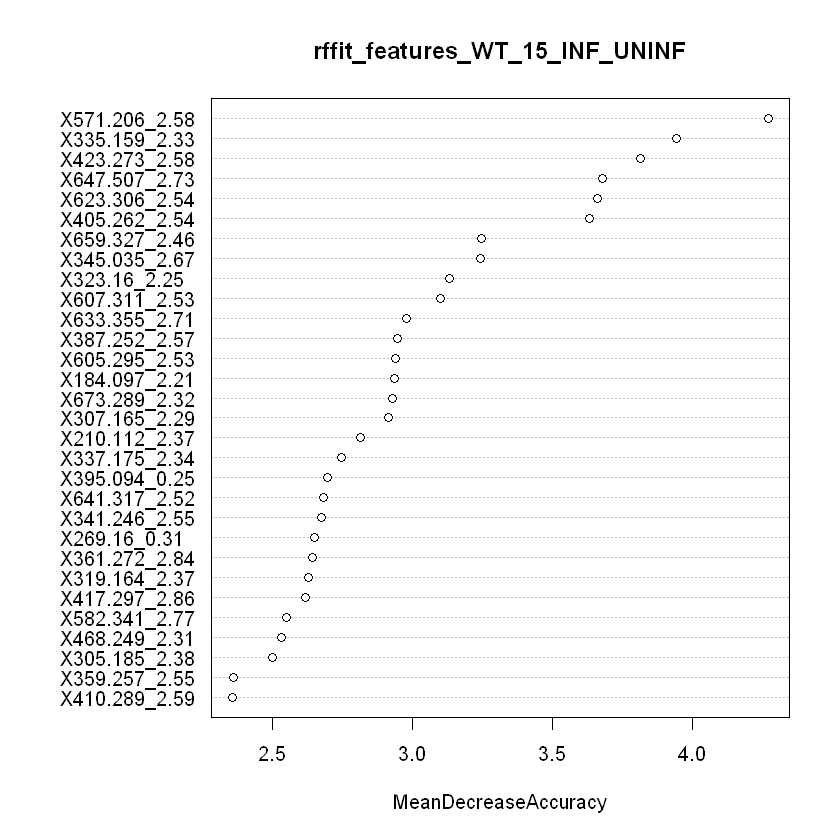

In [27]:
varImp_rffit_features_WT_15_INF_UNINF<-varImpPlot(rffit_features_WT_15_INF_UNINF, type=1)

In [28]:
write.csv(varImp_rffit_features_WT_15_INF_UNINF, "varImp_rffit_LI_contents_features_WT_15_INF_UNINF.csv")

In [29]:
# WT_INF_15 vs.IL1R_INF_15 
features_WT_IL1R_15_INF <-droplevels(subset(features_LI_contents, features_LI_contents$gen_con_DPI==c("WT_INF_15")|features_LI_contents$gen_con_DPI==c("IL1R_INF_15")))
#let's check that the subsetting worked
table(features_LI_contents$gen_con_DPI)

table(features_WT_IL1R_15_INF$gen_con_DPI)


  IL1R_INF_15 IL1R_UNINF_15     WT_INF_15     WT_INF_50   WT_UNINF_15 
           10            10             9             7            10 
  WT_UNINF_50 
           10 


IL1R_INF_15   WT_INF_15 
         10           9 

In [30]:
rffit_features_WT_IL1R_15_INF<- randomForest(features_WT_IL1R_15_INF$gen_con_DPI~., data= features_WT_IL1R_15_INF[,14:2789], importance=TRUE, ntree=1000, na.omit=TRUE, strata=features_WT_IL1R_15_INF$gen_con_DPI, sampsize=rep(min(table(features_WT_IL1R_15_INF$gen_con_DPI)), nlevels(features_WT_IL1R_15_INF$gen_con_DPI)), do.trace=TRUE)

ntree      OOB      1      2
    1:  42.86% 25.00% 66.67%
    2:  61.54% 75.00% 40.00%
    3:  56.25% 77.78% 28.57%
    4:  47.06% 60.00% 28.57%
    5:  47.06% 50.00% 42.86%
    6:  44.44% 40.00% 50.00%
    7:  72.22% 70.00% 75.00%
    8:  68.42% 80.00% 55.56%
    9:  63.16% 60.00% 66.67%
   10:  57.89% 60.00% 55.56%
   11:  57.89% 60.00% 55.56%
   12:  57.89% 50.00% 66.67%
   13:  57.89% 60.00% 55.56%
   14:  52.63% 60.00% 44.44%
   15:  42.11% 50.00% 33.33%
   16:  52.63% 50.00% 55.56%
   17:  47.37% 50.00% 44.44%
   18:  47.37% 50.00% 44.44%
   19:  63.16% 60.00% 66.67%
   20:  68.42% 60.00% 77.78%
   21:  68.42% 70.00% 66.67%
   22:  57.89% 60.00% 55.56%
   23:  57.89% 50.00% 66.67%
   24:  63.16% 60.00% 66.67%
   25:  63.16% 60.00% 66.67%
   26:  57.89% 50.00% 66.67%
   27:  57.89% 60.00% 55.56%
   28:  52.63% 40.00% 66.67%
   29:  47.37% 40.00% 55.56%
   30:  47.37% 50.00% 44.44%
   31:  52.63% 50.00% 55.56%
   32:  68.42% 60.00% 77.78%
   33:  57.89% 40.00% 77.78%
   34:  63.16%

In [31]:
rffit_features_WT_IL1R_15_INF


Call:
 randomForest(formula = features_WT_IL1R_15_INF$gen_con_DPI ~      ., data = features_WT_IL1R_15_INF[, 14:2789], importance = TRUE,      ntree = 1000, na.omit = TRUE, strata = features_WT_IL1R_15_INF$gen_con_DPI,      sampsize = rep(min(table(features_WT_IL1R_15_INF$gen_con_DPI)),          nlevels(features_WT_IL1R_15_INF$gen_con_DPI)), do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 52

        OOB estimate of  error rate: 52.63%
Confusion matrix:
            IL1R_INF_15 WT_INF_15 class.error
IL1R_INF_15           5         5   0.5000000
WT_INF_15             5         4   0.5555556

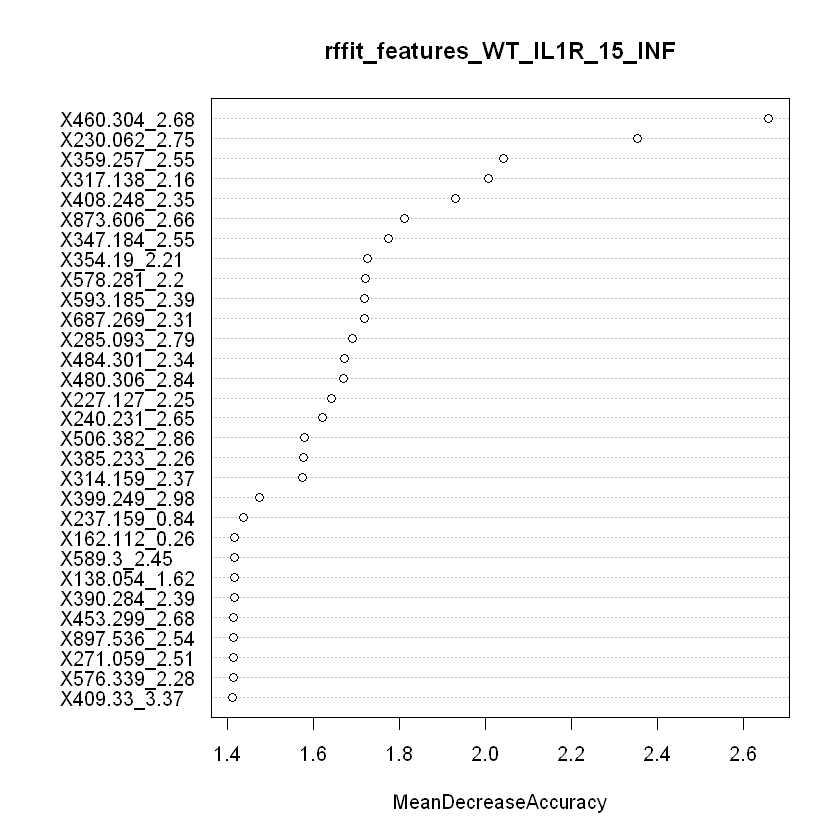

In [32]:
varImp_rffit_features_WT_IL1R_15_INF<-varImpPlot(rffit_features_WT_IL1R_15_INF, type=1)

In [33]:
write.csv(varImp_rffit_features_WT_IL1R_15_INF, "varImp_rffit_LI_contents_features_WT_IL1R_15_INF.csv")

In [34]:
# WT_INF_15 vs. WT_INF_50 
features_WT_INF_15_50 <-droplevels(subset(features_LI_contents, features_LI_contents$gen_con_DPI==c("WT_INF_15")|features_LI_contents$gen_con_DPI==c("WT_INF_50")))
#let's check that the subsetting worked
table(features_LI_contents$gen_con_DPI)

table(features_WT_INF_15_50$gen_con_DPI)


  IL1R_INF_15 IL1R_UNINF_15     WT_INF_15     WT_INF_50   WT_UNINF_15 
           10            10             9             7            10 
  WT_UNINF_50 
           10 


WT_INF_15 WT_INF_50 
        9         7 

In [35]:
rffit_features_WT_INF_15_50<- randomForest(features_WT_INF_15_50$gen_con_DPI~., data= features_WT_INF_15_50[,14:2789], importance=TRUE, ntree=1000, na.omit=TRUE, strata=features_WT_INF_15_50$gen_con_DPI, sampsize=rep(min(table(features_WT_INF_15_50$gen_con_DPI)), nlevels(features_WT_INF_15_50$gen_con_DPI)), do.trace=TRUE)

ntree      OOB      1      2
    1:  16.67% 33.33%  0.00%
    2:  40.00% 20.00% 60.00%
    3:  23.08% 12.50% 40.00%
    4:  20.00%  0.00% 50.00%
    5:  13.33%  0.00% 33.33%
    6:  18.75% 22.22% 14.29%
    7:  18.75% 22.22% 14.29%
    8:  25.00% 33.33% 14.29%
    9:  31.25% 33.33% 28.57%
   10:  25.00% 33.33% 14.29%
   11:  31.25% 33.33% 28.57%
   12:  37.50% 44.44% 28.57%
   13:  43.75% 55.56% 28.57%
   14:  37.50% 55.56% 14.29%
   15:  43.75% 55.56% 28.57%
   16:  43.75% 55.56% 28.57%
   17:  43.75% 55.56% 28.57%
   18:  43.75% 55.56% 28.57%
   19:  43.75% 55.56% 28.57%
   20:  43.75% 44.44% 42.86%
   21:  43.75% 44.44% 42.86%
   22:  37.50% 44.44% 28.57%
   23:  31.25% 33.33% 28.57%
   24:  31.25% 22.22% 42.86%
   25:  31.25% 33.33% 28.57%
   26:  31.25% 33.33% 28.57%
   27:  37.50% 33.33% 42.86%
   28:  43.75% 33.33% 57.14%
   29:  37.50% 33.33% 42.86%
   30:  31.25% 33.33% 28.57%
   31:  25.00% 22.22% 28.57%
   32:  25.00% 22.22% 28.57%
   33:  31.25% 22.22% 42.86%
   34:  25.00%

In [36]:
rffit_features_WT_INF_15_50


Call:
 randomForest(formula = features_WT_INF_15_50$gen_con_DPI ~ .,      data = features_WT_INF_15_50[, 14:2789], importance = TRUE,      ntree = 1000, na.omit = TRUE, strata = features_WT_INF_15_50$gen_con_DPI,      sampsize = rep(min(table(features_WT_INF_15_50$gen_con_DPI)),          nlevels(features_WT_INF_15_50$gen_con_DPI)), do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 52

        OOB estimate of  error rate: 18.75%
Confusion matrix:
          WT_INF_15 WT_INF_50 class.error
WT_INF_15         6         3   0.3333333
WT_INF_50         0         7   0.0000000

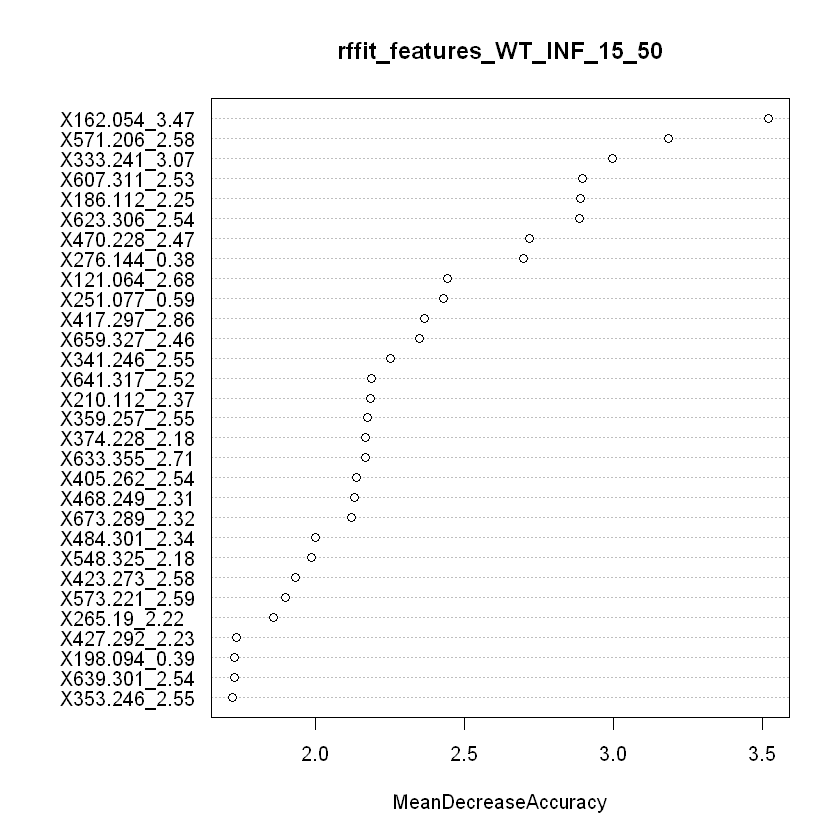

In [37]:
varImp_rffit_features_WT_INF_15_50<-varImpPlot(rffit_features_WT_INF_15_50, type=1)

In [38]:
write.csv(varImp_rffit_features_WT_INF_15_50, "varImp_rffit_LI_contents_features_WT_INF_15_50.csv")

In [39]:
# IL1R_INF_15 vs. IL1R_UNINF_15 
features_IL1R_INF_UNINF_15 <-droplevels(subset(features_LI_contents, features_LI_contents$gen_con_DPI==c("IL1R_INF_15")|features_LI_contents$gen_con_DPI==c("IL1R_UNINF_15")))
#let's check that the subsetting worked
table(features_LI_contents$gen_con_DPI)

table(features_IL1R_INF_UNINF_15$gen_con_DPI)


  IL1R_INF_15 IL1R_UNINF_15     WT_INF_15     WT_INF_50   WT_UNINF_15 
           10            10             9             7            10 
  WT_UNINF_50 
           10 


  IL1R_INF_15 IL1R_UNINF_15 
           10            10 

In [40]:
rffit_features_IL1R_INF_UNINF_15<- randomForest(features_IL1R_INF_UNINF_15$gen_con_DPI~., data= features_IL1R_INF_UNINF_15[,14:2789], importance=TRUE, ntree=1000, na.omit=TRUE, strata=features_IL1R_INF_UNINF_15$gen_con_DPI, sampsize=rep(min(table(features_IL1R_INF_UNINF_15$gen_con_DPI)), nlevels(features_IL1R_INF_UNINF_15$gen_con_DPI)), do.trace=TRUE)

ntree      OOB      1      2
    1:  28.57% 50.00%  0.00%
    2:  38.46% 42.86% 33.33%
    3:  35.71% 28.57% 42.86%
    4:  37.50% 44.44% 28.57%
    5:  26.32% 30.00% 22.22%
    6:  35.00% 30.00% 40.00%
    7:  20.00% 20.00% 20.00%
    8:  25.00% 20.00% 30.00%
    9:  15.00% 10.00% 20.00%
   10:  30.00% 20.00% 40.00%
   11:  35.00% 40.00% 30.00%
   12:  25.00% 20.00% 30.00%
   13:  35.00% 30.00% 40.00%
   14:  30.00% 20.00% 40.00%
   15:  30.00% 20.00% 40.00%
   16:  25.00% 30.00% 20.00%
   17:  35.00% 30.00% 40.00%
   18:  35.00% 30.00% 40.00%
   19:  30.00% 30.00% 30.00%
   20:  30.00% 30.00% 30.00%
   21:  30.00% 30.00% 30.00%
   22:  15.00% 20.00% 10.00%
   23:  25.00% 30.00% 20.00%
   24:  20.00% 30.00% 10.00%
   25:  20.00% 30.00% 10.00%
   26:  25.00% 20.00% 30.00%
   27:  40.00% 30.00% 50.00%
   28:  35.00% 20.00% 50.00%
   29:  30.00% 20.00% 40.00%
   30:  35.00% 30.00% 40.00%
   31:  25.00% 20.00% 30.00%
   32:  30.00% 30.00% 30.00%
   33:  25.00% 30.00% 20.00%
   34:  20.00%

In [41]:
rffit_features_IL1R_INF_UNINF_15


Call:
 randomForest(formula = features_IL1R_INF_UNINF_15$gen_con_DPI ~      ., data = features_IL1R_INF_UNINF_15[, 14:2789], importance = TRUE,      ntree = 1000, na.omit = TRUE, strata = features_IL1R_INF_UNINF_15$gen_con_DPI,      sampsize = rep(min(table(features_IL1R_INF_UNINF_15$gen_con_DPI)),          nlevels(features_IL1R_INF_UNINF_15$gen_con_DPI)), do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 52

        OOB estimate of  error rate: 5%
Confusion matrix:
              IL1R_INF_15 IL1R_UNINF_15 class.error
IL1R_INF_15             9             1         0.1
IL1R_UNINF_15           0            10         0.0

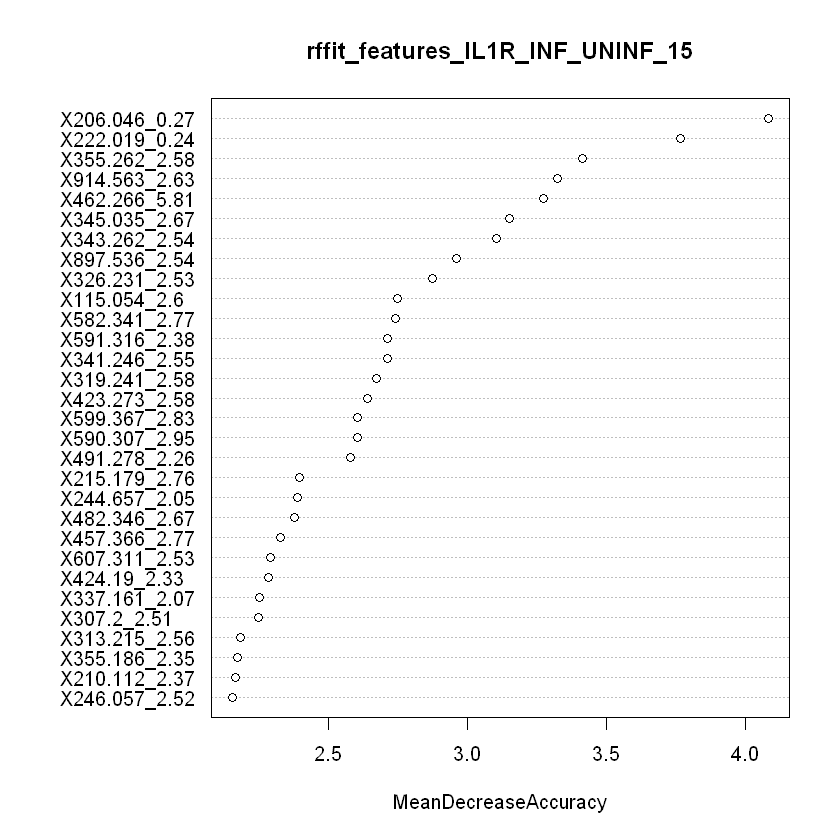

In [42]:
varImp_rffit_features_IL1R_INF_UNINF_15<-varImpPlot(rffit_features_IL1R_INF_UNINF_15, type=1)

In [43]:
write.csv(varImp_rffit_features_IL1R_INF_UNINF_15, "varImp_rffit_LI_contents_features_IL1R_INF_UNINF_15.csv")

In [44]:
# IL1R_UNINF_15 vs. WT_UNINF_15 
features_IL1R_WT_UNINF_15 <-droplevels(subset(features_LI_contents, features_LI_contents$gen_con_DPI==c("IL1R_UNINF_15")|features_LI_contents$gen_con_DPI==c("WT_UNINF_15")))
#let's check that the subsetting worked
table(features_LI_contents$gen_con_DPI)

table(features_IL1R_WT_UNINF_15$gen_con_DPI)


  IL1R_INF_15 IL1R_UNINF_15     WT_INF_15     WT_INF_50   WT_UNINF_15 
           10            10             9             7            10 
  WT_UNINF_50 
           10 


IL1R_UNINF_15   WT_UNINF_15 
           10            10 

In [45]:
rffit_features_IL1R_WT_UNINF_15<- randomForest(features_IL1R_WT_UNINF_15$gen_con_DPI~., data= features_IL1R_WT_UNINF_15[,14:2789], importance=TRUE, ntree=1000, na.omit=TRUE, strata=features_IL1R_WT_UNINF_15$gen_con_DPI, sampsize=rep(min(table(features_IL1R_WT_UNINF_15$gen_con_DPI)), nlevels(features_IL1R_WT_UNINF_15$gen_con_DPI)), do.trace=TRUE)

ntree      OOB      1      2
    1:  66.67%100.00%  0.00%
    2:  45.45% 57.14% 25.00%
    3:  42.86% 62.50% 16.67%
    4:  50.00% 66.67% 28.57%
    5:  41.18% 55.56% 25.00%
    6:  50.00% 60.00% 37.50%
    7:  55.00% 70.00% 40.00%
    8:  40.00% 60.00% 20.00%
    9:  50.00% 70.00% 30.00%
   10:  30.00% 60.00%  0.00%
   11:  30.00% 60.00%  0.00%
   12:  35.00% 50.00% 20.00%
   13:  45.00% 50.00% 40.00%
   14:  40.00% 60.00% 20.00%
   15:  35.00% 50.00% 20.00%
   16:  40.00% 50.00% 30.00%
   17:  50.00% 50.00% 50.00%
   18:  55.00% 60.00% 50.00%
   19:  50.00% 50.00% 50.00%
   20:  40.00% 40.00% 40.00%
   21:  35.00% 40.00% 30.00%
   22:  40.00% 50.00% 30.00%
   23:  40.00% 50.00% 30.00%
   24:  40.00% 50.00% 30.00%
   25:  45.00% 60.00% 30.00%
   26:  45.00% 60.00% 30.00%
   27:  45.00% 60.00% 30.00%
   28:  40.00% 60.00% 20.00%
   29:  30.00% 40.00% 20.00%
   30:  35.00% 50.00% 20.00%
   31:  35.00% 60.00% 10.00%
   32:  35.00% 60.00% 10.00%
   33:  35.00% 60.00% 10.00%
   34:  35.00%

In [46]:
rffit_features_IL1R_WT_UNINF_15


Call:
 randomForest(formula = features_IL1R_WT_UNINF_15$gen_con_DPI ~      ., data = features_IL1R_WT_UNINF_15[, 14:2789], importance = TRUE,      ntree = 1000, na.omit = TRUE, strata = features_IL1R_WT_UNINF_15$gen_con_DPI,      sampsize = rep(min(table(features_IL1R_WT_UNINF_15$gen_con_DPI)),          nlevels(features_IL1R_WT_UNINF_15$gen_con_DPI)), do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 52

        OOB estimate of  error rate: 30%
Confusion matrix:
              IL1R_UNINF_15 WT_UNINF_15 class.error
IL1R_UNINF_15             8           2         0.2
WT_UNINF_15               4           6         0.4

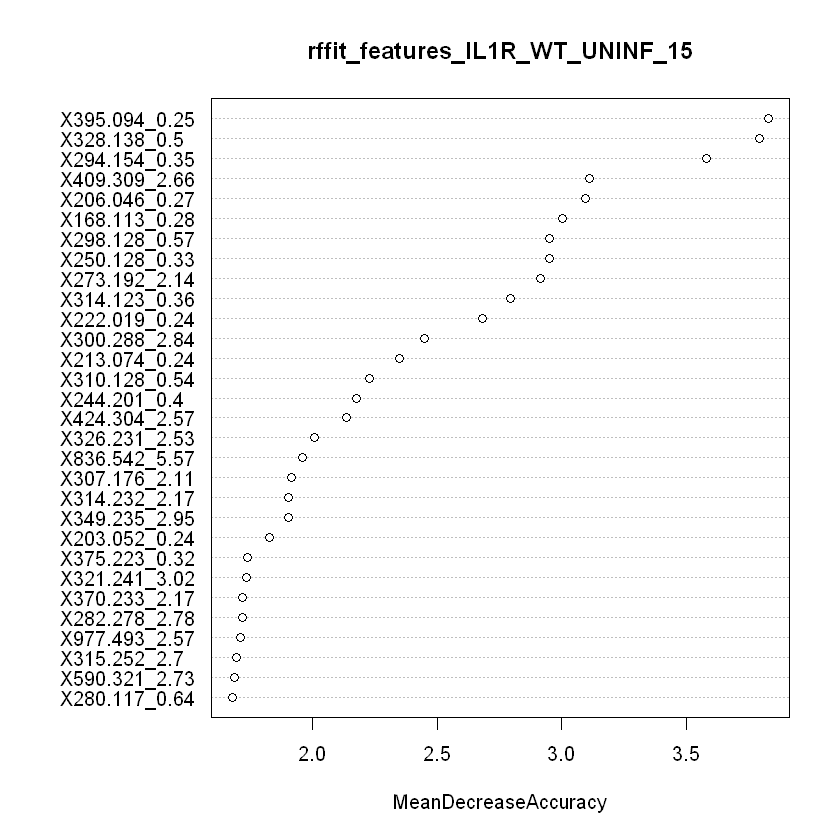

In [47]:
varImp_rffit_features_IL1R_WT_UNINF_15<-varImpPlot(rffit_features_IL1R_WT_UNINF_15, type=1)

In [48]:
write.csv(varImp_rffit_features_IL1R_WT_UNINF_15, "varImp_rffit_LI_contents_features_IL1R_WT_UNINF_15.csv")

In [49]:
# WT_INF_50 vs. WT_UNINF_50 
features_WT_INF_UNINF_50 <-droplevels(subset(features_LI_contents, features_LI_contents$gen_con_DPI==c("WT_INF_50")|features_LI_contents$gen_con_DPI==c("WT_UNINF_50")))
#let's check that the subsetting worked
table(features_LI_contents$gen_con_DPI)

table(features_WT_INF_UNINF_50$gen_con_DPI)


  IL1R_INF_15 IL1R_UNINF_15     WT_INF_15     WT_INF_50   WT_UNINF_15 
           10            10             9             7            10 
  WT_UNINF_50 
           10 


  WT_INF_50 WT_UNINF_50 
          7          10 

In [50]:
rffit_features_WT_INF_UNINF_50<- randomForest(features_WT_INF_UNINF_50$gen_con_DPI~., data= features_WT_INF_UNINF_50[,14:2789], importance=TRUE, ntree=1000, na.omit=TRUE, strata=features_WT_INF_UNINF_50$gen_con_DPI, sampsize=rep(min(table(features_WT_INF_UNINF_50$gen_con_DPI)), nlevels(features_WT_INF_UNINF_50$gen_con_DPI)), do.trace=TRUE)

ntree      OOB      1      2
    1:  14.29% 33.33%  0.00%
    2:  16.67% 40.00%  0.00%
    3:  42.86% 33.33% 50.00%
    4:  18.75% 28.57% 11.11%
    5:  12.50% 14.29% 11.11%
    6:  29.41% 28.57% 30.00%
    7:  17.65% 14.29% 20.00%
    8:  11.76% 14.29% 10.00%
    9:  17.65% 14.29% 20.00%
   10:  29.41% 14.29% 40.00%
   11:  35.29% 28.57% 40.00%
   12:  23.53% 28.57% 20.00%
   13:  29.41% 28.57% 30.00%
   14:  23.53% 28.57% 20.00%
   15:  23.53% 14.29% 30.00%
   16:  17.65% 14.29% 20.00%
   17:  17.65% 14.29% 20.00%
   18:  23.53% 28.57% 20.00%
   19:  23.53% 14.29% 30.00%
   20:  17.65%  0.00% 30.00%
   21:  23.53% 14.29% 30.00%
   22:  23.53% 14.29% 30.00%
   23:  23.53% 14.29% 30.00%
   24:  17.65% 14.29% 20.00%
   25:  23.53% 14.29% 30.00%
   26:  17.65%  0.00% 30.00%
   27:  23.53% 14.29% 30.00%
   28:  23.53% 14.29% 30.00%
   29:  11.76% 14.29% 10.00%
   30:  17.65% 14.29% 20.00%
   31:  23.53% 28.57% 20.00%
   32:  23.53% 28.57% 20.00%
   33:  23.53% 28.57% 20.00%
   34:  17.65%

In [51]:
rffit_features_WT_INF_UNINF_50


Call:
 randomForest(formula = features_WT_INF_UNINF_50$gen_con_DPI ~      ., data = features_WT_INF_UNINF_50[, 14:2789], importance = TRUE,      ntree = 1000, na.omit = TRUE, strata = features_WT_INF_UNINF_50$gen_con_DPI,      sampsize = rep(min(table(features_WT_INF_UNINF_50$gen_con_DPI)),          nlevels(features_WT_INF_UNINF_50$gen_con_DPI)), do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 52

        OOB estimate of  error rate: 17.65%
Confusion matrix:
            WT_INF_50 WT_UNINF_50 class.error
WT_INF_50           5           2   0.2857143
WT_UNINF_50         1           9   0.1000000

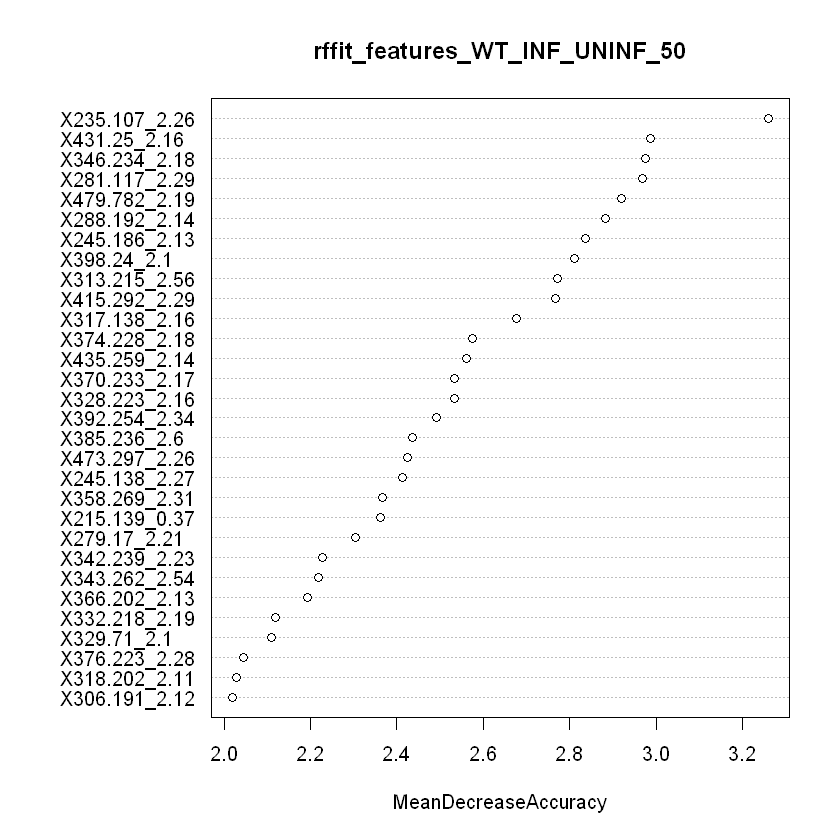

In [52]:
varImp_rffit_features_WT_INF_UNINF_50<-varImpPlot(rffit_features_WT_INF_UNINF_50, type=1)

In [53]:
write.csv(varImp_rffit_features_WT_INF_UNINF_50, "varImp_rffit_LI_contents_features_WT_INF_UNINF_50.csv")

# Fandom forest results for LI_contents (before QC correction)
#### WT-infected-15 vs WT-uninfected-15 (OOB error = %)
#### IL1R-infected-15 vs WT-infected-50 (OOB error = %)
#### WT-infected-15 vs WT-infected-50 (OOB error=%)
#### IL1R-uninfected-15 vs WT-uninfected-15 (OOB error =%)
#### IL1R-infected-15 vs IL1R-uninfected-15 (OOB error= %)
#### WT-infected-50 vs WT-uninfected-50 (OOB error = %)

#### IL1R-uninfected-15 vs WT-uninfected-50 (OOB error =%)
#### IL1R-infected-15 vs WT-infected-15 (OOB error =%)
#### WT-uninfected-15 vs WT-uninfected-50 (OOB error = %)

# Fandom forest results for LI_contents (After QC correction)
#### WT-infected-15 vs WT-uninfected-15 (OOB error = 0%)
#### IL1R-infected-15 vs WT-infected-50 (OOB error = 52.63%)
#### WT-infected-15 vs WT-infected-50 (OOB error=18.75%)
#### IL1R-infected-15 vs IL1R-uninfected-15 (OOB error= 5%)
#### IL1R-uninfected-15 vs WT-uninfected-15 (OOB error = 30%)
#### WT-infected-50 vs WT-uninfected-50 (OOB error = 17.65%)